In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import scipy.stats as stats
import sympy as sp
from IPython.display import display
from plotly.subplots import make_subplots

In [2]:
def mortality(inv_lambda_rate, inv_lambda_max, timestep=1, seapopym=False):
    temperature = np.linspace(0, 50, 100)
    inv_lambda_ = inv_lambda_max * np.exp(-inv_lambda_rate * temperature)
    if seapopym:
        return np.exp(-timestep * (1 / inv_lambda_))
    return inv_lambda_

# Lambda


In [51]:
# Initial values
inv_lambda_rate_init = 0.15
inv_lambda_max_init = 150

# Generate initial data
temperature = np.linspace(0, 50, 100)


def update_plot(rate, max_val):
    plt.plot(temperature, 1 / mortality(rate, max_val, seapopym=False))
    plt.xlabel("Temperature (°C)")
    plt.ylabel("inv_lambda")
    plt.title("Mortality Rate vs Temperature")
    plt.grid()
    plt.show()


# Création des sliders
slider_rate_ipy = widgets.FloatSlider(
    value=inv_lambda_rate_init,
    min=0.0,
    max=1,
    step=0.01,
    description="Rate:",
    layout=widgets.Layout(width="50%"),
)
slider_max_ipy = widgets.IntSlider(
    value=inv_lambda_max_init,
    min=1,
    max=300,
    step=1,
    description="Max:",
    layout=widgets.Layout(width="50%"),
)

widgets.interactive(update_plot, rate=slider_rate_ipy, max_val=slider_max_ipy)

interactive(children=(FloatSlider(value=0.15, description='Rate:', layout=Layout(width='50%'), max=1.0, step=0…

In [4]:
# Définir les symboles
inv_lambda_max, inv_lambda_rate, temperature = sp.symbols("inv_lambda_max inv_lambda_rate temperature")

# Définir la fonction
Y = inv_lambda_max * sp.exp(-inv_lambda_rate * temperature)

# Calcul de la dérivée partielle par rapport à a et b
dY_dinv_lambda_max = sp.diff(Y, inv_lambda_max)
dY_dinv_lambda_rate = sp.diff(Y, inv_lambda_rate)

print("Dérivée partielle par rapport à inv_lambda_max:", dY_dinv_lambda_max)
print("Dérivée partielle par rapport à inv_lambda_rate:", dY_dinv_lambda_rate)

Dérivée partielle par rapport à inv_lambda_max: exp(-inv_lambda_rate*temperature)
Dérivée partielle par rapport à inv_lambda_rate: -inv_lambda_max*temperature*exp(-inv_lambda_rate*temperature)


Text(0.5, 1.0, 'Correlation between Rate and Max of 1/Lambda')

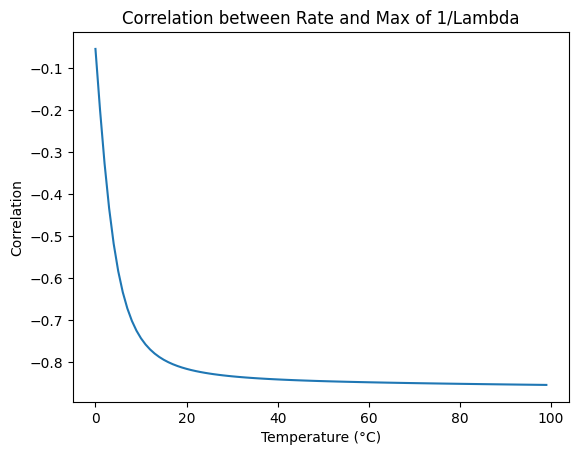

In [53]:
# LAMBDA
def correlation_by_temperature(temperature):
    # Générer des échantillons de A et B
    np.random.seed(42)
    num_samples = 10000
    inv_lambda_max = np.random.uniform(0, 300, num_samples)  # A varie entre 1 et 10
    inv_lambda_rate = np.random.uniform(0, 1, num_samples)  # B varie entre 0 et 1

    # Calcul des dérivées partielles
    dY_dA = np.exp(-inv_lambda_rate * temperature)
    dY_dB = -inv_lambda_max * temperature * np.exp(-inv_lambda_rate * temperature)

    # Calcul de la corrélation de Pearson entre dY/dA et dY/dB
    corr_pearson, _ = stats.pearsonr(dY_dA, dY_dB)
    return corr_pearson


corr_coef = [correlation_by_temperature(temperature) for temperature in np.linspace(0.1, 30, 100)]
plt.plot(corr_coef)
plt.xlabel("Temperature (°C)")
plt.ylabel("Correlation")
plt.title("Correlation between Rate and Max of 1/Lambda")

# Ratio survie


In [37]:
# Initial values
inv_lambda_rate_init = 0.15
inv_lambda_max_init = 150

# Generate initial data
temperature = np.linspace(0, 50, 100)


def update_plot(rate, max_val):
    plt.plot(temperature, mortality(rate, max_val, seapopym=True))
    plt.xlabel("Temperature (°C)")
    plt.ylabel("inv_lambda")
    plt.title("Survivability ratio (Seapopym) vs Temperature")
    plt.grid()
    plt.show()


# Création des sliders
slider_rate_ipy = widgets.FloatSlider(
    value=inv_lambda_rate_init,
    min=0.0,
    max=1,
    step=0.01,
    description="Rate:",
    layout=widgets.Layout(width="50%"),
)
slider_max_ipy = widgets.IntSlider(
    value=inv_lambda_max_init,
    min=1,
    max=300,
    step=1,
    description="Max:",
    layout=widgets.Layout(width="50%"),
)

widgets.interactive(update_plot, rate=slider_rate_ipy, max_val=slider_max_ipy)

interactive(children=(FloatSlider(value=0.15, description='Rate:', layout=Layout(width='50%'), max=1.0, step=0…

In [50]:
def sigmoid(x, k=1, x_0=0):
    return 1 / (1 + np.exp(k * (x - x_0)))


def update_sigmoid(k, x_0):
    x = np.linspace(0, 50, 100)
    y = sigmoid(x, k, x_0)
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("Sigmoid(x)")
    plt.title("Sigmoid Function")
    plt.grid()
    plt.show()


# Création des sliders
slider_k_ipy = widgets.FloatSlider(
    value=1,
    min=0.0,
    max=2,
    step=0.05,
    description="K:",
    layout=widgets.Layout(width="50%"),
)
slider_x_0_ipy = widgets.IntSlider(
    value=20,
    min=0,
    max=50,
    step=1,
    description="X_0:",
    layout=widgets.Layout(width="50%"),
)


widgets.interactive(update_sigmoid, k=slider_k_ipy, x_0=slider_x_0_ipy)

interactive(children=(FloatSlider(value=1.0, description='K:', layout=Layout(width='50%'), max=2.0, step=0.05)…

In [7]:
# Définir les symboles
inv_lambda_max, inv_lambda_rate, temperature = sp.symbols("inv_lambda_max inv_lambda_rate temperature")

# Définir la fonction
Y = sp.exp(-1 / (inv_lambda_max * sp.exp(-inv_lambda_rate * temperature)))

# Calcul de la dérivée partielle par rapport à a et b
dY_dinv_lambda_max = sp.diff(Y, inv_lambda_max)
dY_dinv_lambda_rate = sp.diff(Y, inv_lambda_rate)

print("Dérivée partielle par rapport à inv_lambda_max:", dY_dinv_lambda_max)
print("Dérivée partielle par rapport à inv_lambda_rate:", dY_dinv_lambda_rate)

Dérivée partielle par rapport à inv_lambda_max: exp(-exp(inv_lambda_rate*temperature)/inv_lambda_max)*exp(inv_lambda_rate*temperature)/inv_lambda_max**2
Dérivée partielle par rapport à inv_lambda_rate: -temperature*exp(-exp(inv_lambda_rate*temperature)/inv_lambda_max)*exp(inv_lambda_rate*temperature)/inv_lambda_max


Text(0.5, 1.0, 'Correlation between Rate and Max of the survival ratio')

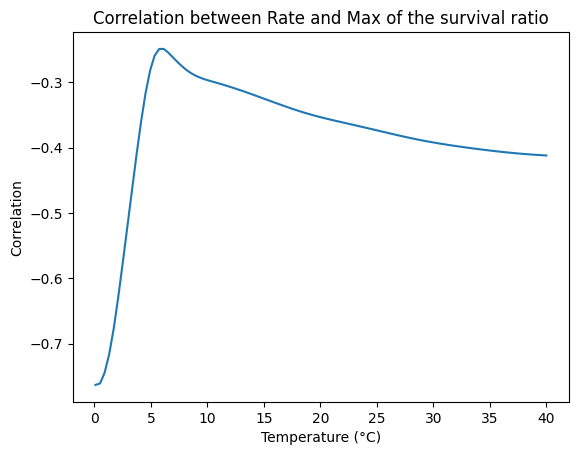

In [52]:
# RATIO DE SURVIE
def correlation_by_temperature(temperature):
    # Générer des échantillons de A et B
    np.random.seed(42)
    num_samples = 10000
    inv_lambda_max = np.random.uniform(0, 200, num_samples)
    inv_lambda_rate = np.random.uniform(0, 1, num_samples)

    dY_dinv_lambda_max = (
        np.exp(-np.exp(inv_lambda_rate * temperature) / inv_lambda_max)
        * np.exp(inv_lambda_rate * temperature)
        / inv_lambda_max**2
    )
    dY_dinv_lambda_rate = (
        -temperature
        * np.exp(-np.exp(inv_lambda_rate * temperature) / inv_lambda_max)
        * np.exp(inv_lambda_rate * temperature)
        / inv_lambda_max
    )

    # Calcul de la corrélation de Pearson entre dY/dA et dY/dB
    corr_pearson, _ = stats.pearsonr(dY_dinv_lambda_max, dY_dinv_lambda_rate)
    return corr_pearson


corr_coef = [correlation_by_temperature(temperature) for temperature in np.linspace(0.1, 40, 100)]
plt.plot(np.linspace(0.1, 40, 100), corr_coef)
plt.xlabel("Temperature (°C)")
plt.ylabel("Correlation")
plt.title("Correlation between Rate and Max of the survival ratio")